Find out do any of the bus drivers cause deviations in departure times from bus stops.


In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import codecs
import csv

In [2]:
with open('varem.csv') as f:
    tekst = f.readlines()


In [3]:
with open('varemkirjutatud.csv', mode='w', encoding="utf-8") as f:
    wr = csv.writer(f, delimiter=';')
    for rida in tekst:
        osad = rida.strip().split(';')
        wr.writerow(osad)

In [4]:
varem = pd.read_csv('varemkirjutatud.csv', sep=";")
#varem['estimated_departure_time'].value_counts()
#varem.loc[varem['trip_id'] == 2341597]

#We plan on using fields: route_short_name, a_date, trip_id, trip_departure_time, stop_name, departure_time, estimated_departure_time, deviation, name, stop_sequence.

#df1 = varem[['route_short_name','a_date', 'trip_id', 'trip_departure_time', 'stop_name', 'departure_time', 'estimated_departure_time', 'deviation', 'name', 'stop_sequence' ]]
df1 = varem
#df1.head()
numeric = varem[['deviation']]
nameDaviation = varem[['deviation', 'name']]
nameCounts = nameDaviation['name'].value_counts()
#df1.set_index('name')['nameCounts'].plot.bar()
#nameDaviation.shape
#hist = nameCounts.hist()
#nameCounts

In [5]:
with open('hiljem.csv') as f:
    tekst = f.readlines()
    
with open('hiljemkirjutatud.csv', mode='w', encoding="utf-8") as f:
    wr = csv.writer(f, delimiter=';')
    for rida in tekst:
        osad = rida.strip().split(';')
        wr.writerow(osad)

hiljem = pd.read_csv('hiljemkirjutatud.csv', sep=";")

#df2 = hiljem[['route_short_name','a_date', 'trip_id', 'trip_departure_time', 'stop_name', 'departure_time', 'estimated_departure_time', 'deviation', 'name', 'stop_sequence' ]]
df2 = hiljem

In [6]:
data = pd.concat([df1, df2])


In [7]:
# parandatakse deviation ja estimated_departure_time andmed
new_estimated_departure_time = []
new_deviation = []
for dp, ed, dev in zip(data["departure_time"],data["estimated_departure_time"], data['deviation']):
    if "," in ed:
        #print(dp)
        #print(ed)
        dp_o = dp.split(":")
        ed_o = ed.split(",")
        ed_o = ed_o[0].split(":")
        dev = dev.split('.')[0]
        dev = dev.split(',')[0]
        if len(dev.split(":")) < 3:
            dev = "00:"+dev
        new_deviation += [dev]
        lst = []
        if ed_o[0][0] != '0' and ed_o[0][0] != '5':
            lst += [dp_o[0]]
            lst +=ed_o
        elif ed_o[0][0] == '0':     
            if dp_o[1][0] == '5':
                if dp_o[0] != '23':
                    abi = int(dp_o[0])+1
                else:
                    abi = '00'
                lst += [str(abi)]
                lst +=ed_o
            else:
                lst += [dp_o[0]]
                lst +=ed_o
        elif ed_o[0][0] == '5':     
            if dp_o[1][0] == '0':
                if dp_o[0] != '00':
                    abi = int(dp_o[0])-1
                else:
                    abi = '23'
                lst += [str(abi)]
                lst +=ed_o
            else:
                lst += [dp_o[0]]
                lst +=ed_o
        aeg = ":".join(lst)
        new_estimated_departure_time += [aeg]
    else:
        new_estimated_departure_time += [ed]
        dev = dev.split(".")[0]
        if len(dev.split(":")) < 3:
            dev = "00:"+dev
        new_deviation += [dev]
#new_deviation

In [8]:
data['new_estimated_departure_time'] = new_estimated_departure_time
data['new_deviation'] = new_deviation
#data

Text(0, 0.5, 'Deviation counts')

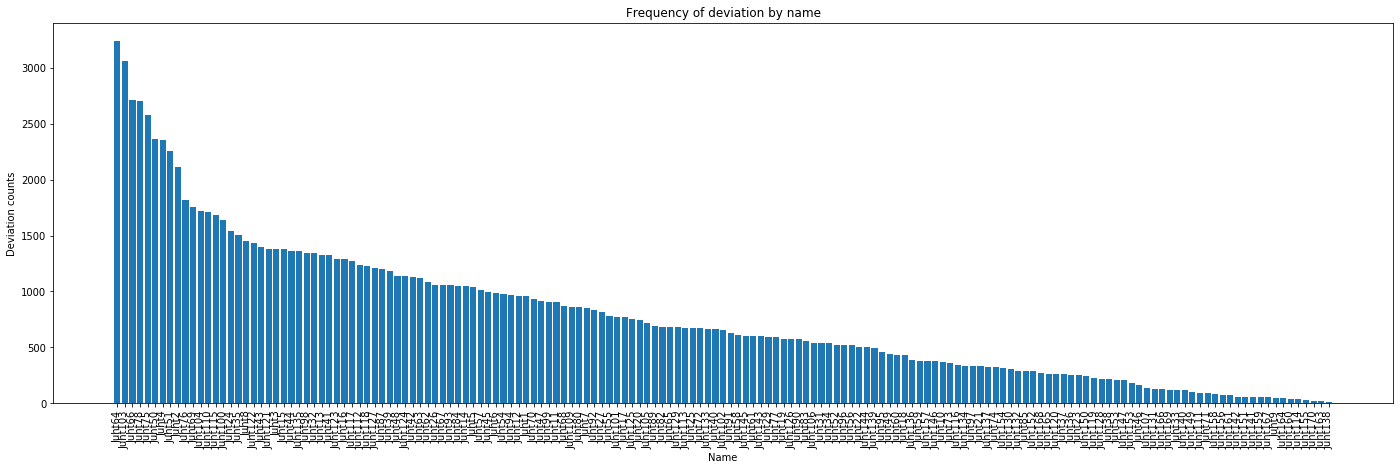

In [10]:
#Varem jõudnud

fig, ax = plt.subplots(figsize=(24,7)) 
# count the occurrence of each class 
data = varem['name'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 

ax.bar(points, frequency)
# set title and labels 
ax.set_title('Frequency of deviation by name') 
ax.set_xlabel('Name')
ax.xaxis.set_tick_params(rotation=90)


ax.set_ylabel('Deviation counts')

Text(0, 0.5, 'Deviation counts')

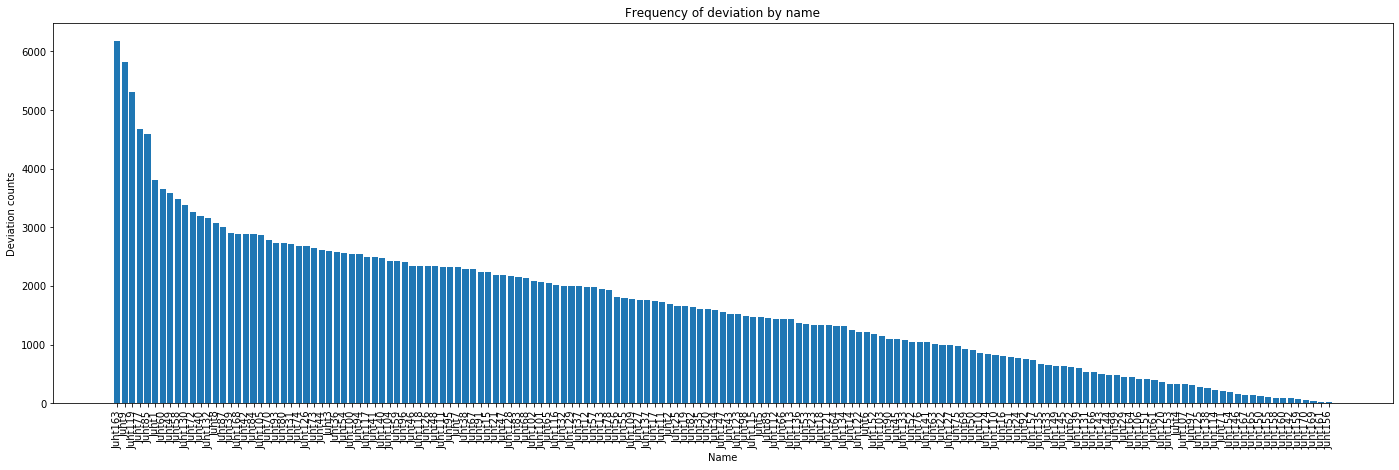

In [12]:
#Hiljem jõudnud

fig, ax = plt.subplots(figsize=(24,7)) 
data = hiljem['name'].value_counts() 
points = data.index 
frequency = data.values 
ax.bar(points, frequency)
ax.set_title('Frequency of deviation by name') 
ax.set_xlabel('Name')
ax.xaxis.set_tick_params(rotation=90)
ax.set_ylabel('Deviation counts')

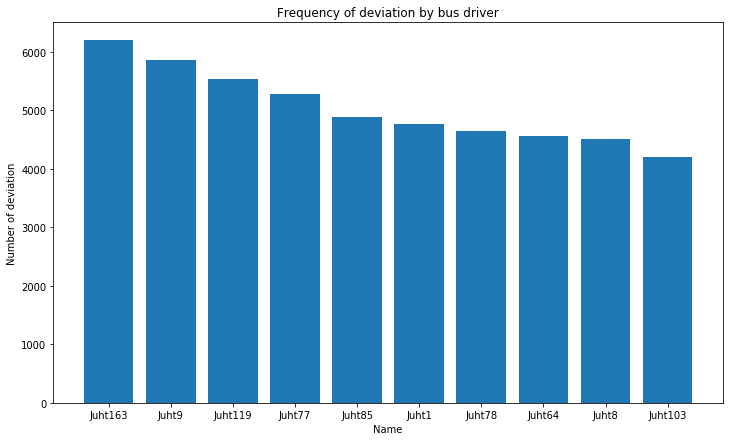

In [13]:
#Hiljem ja varem koos

data = pd.concat([df1, df2])


fig, ax = plt.subplots(figsize=(12,7)) 
data = data['name'].value_counts() 
datatop = data.head(10)
points = datatop.index 
frequency = datatop.values 
ax.bar(points, frequency)
ax.set_title('Frequency of deviation by bus driver') 
ax.set_xlabel('Name')
ax.xaxis.set_tick_params(rotation=0)
ax.set_ylabel('Number of deviation')
plt.savefig('myfile.pdf')



In [28]:
#Saab vaadata ühe juhi deviationeid
data = pd.concat([df1, df2])

#data.loc[data['name'] == 'Juht163'].route_short_name.value_counts()
data.loc[data['name'] == 'Juht163']


,id,route_short_name,route_long_name,a_date,trip_departure_time,trip_id,stop_sequence,stop_id,stop_name,departure_time,estimated_departure_time,deviation,user_id,name,location_id,stop_code
14004,314640153,9,Ringliin 1,06.09.2019,05:25:00,2341525,27,2044168,Linda,06:03:00,06:02:41,-00:00:19,16797,Juht163,432TNS,7820129-1
14005,314591334,9,Ringliin 1,06.09.2019,05:25:00,2341525,54,2043925,Nõlvaku,06:50:00,06:48:47,-00:01:13,16797,Juht163,432TNS,7820166-1
20892,315309941,3,Zoomeedikum - Kesklinn - Nõlvaku,08.09.2019,17:27:00,2340453,23,2044021,Zoomeedikum,18:03:00,18:02:45,-00:00:15,16797,Juht163,432TNS,7820258-2
28209,315952561,7,Ringtee - ERM - Kaupmehe,10.09.2019,22:50:00,2360905,20,2059570,Ringtee,23:16:00,23:15:35,-00:00:25,16797,Juht163,432TNS,7820320-1
28260,316026962,7,Ringtee - ERM - Kaupmehe,10.09.2019,23:16:00,2360951,11,2059376,Soola,23:27:00,23:26:48,-00:00:12,16797,Juht163,432TNS,7820248-1
50921,319046701,3,Zoomeedikum - Nõlvaku,19.09.2019,08:47:00,2386326,23,2074931,Zoomeedikum,09:25:00,09:24:28,-00:00:32,16797,Juht163,432TNS,7820258-2
66426,320875894,3,Zoomeedikum - Nõlvaku,24.09.2019,23:25:00,2386370,1,2074863,Nõlvaku,23:25:00,23:23:18,-00:01:42,16797,Juht163,341TNS,7820165-1
73129,322105356,7,Ringtee - ERM - Kaupmehe,27.09.2019,10:22:00,2386658,21,2075094,Kaupmehe,10:51:00,10:50:35,-00:00:25,16797,Juht163,432TNS,7801229-1
75019,322258317,9,Ringliin 1,28.09.2019,08:40:00,2386301,54,2074839,Nõlvaku,10:08:00,10:07:40,-00:00:20,16797,Juht163,432TNS,7820166-1
77345,322462512,7,Ringtee - ERM - Kaupmehe,29.09.2019,12:22:00,2386072,21,2075094,Kaupmehe,12:51:00,12:50:07,-00:00:53,16797,Juht163,432TNS,7801229-1
